# Data Analysis for Home Credit Default Risk

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../data'
APP_TRAIN_FILENAME = 'application_train.csv'
APP_TEST_FILENAME = 'application_test.csv'
BUREAU_FILENAME = 'bereau.csv'
BUREAU_BALANCE_FILENAME = 'bureau_balance.csv'
CREDIT_CARD_BALANCE_FILENAME = 'credit_card_balance.csv'
INSTALLMENTS_PAYMENTS = 'installments_payments.csv'
POS_CACHE_BALANCE_FILENAME = 'POS_CACHE_balance.csv'
PREVIOUS_APP_FILENAME = 'previous_application.csv'

## User Information

In [3]:
APP_TRAIN_PATH = os.path.join(DATA_DIR, APP_TRAIN_FILENAME)
user_df = pd.read_csv(APP_TRAIN_PATH)
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
user_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
user_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
for col in user_df.columns:
    print('--------%s--------'%(col,))
    print(user_df[col].value_counts())

--------SK_ID_CURR--------
100303    1
131861    1
158488    1
156441    1
160539    1
150300    1
148253    1
154398    1
152351    1
238369    1
244514    1
242467    1
230181    1
236326    1
234279    1
254761    1
260906    1
135959    1
133908    1
248620    1
144147    1
176899    1
166660    1
164613    1
170758    1
168711    1
191240    1
189193    1
195338    1
193291    1
         ..
151011    1
161252    1
163301    1
157158    1
159207    1
136680    1
138729    1
132586    1
134635    1
144876    1
146925    1
239070    1
245213    1
243164    1
247250    1
210380    1
212429    1
206286    1
208335    1
251344    1
253393    1
249299    1
230874    1
259540    1
261589    1
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
--------TARGET--------
0    282686
1     24825
Name: TARGET, dtype: int64
--------NAME_CONTRACT_TYPE--------
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: 

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64
--------FLAG_EMP_PHONE--------
1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64
--------FLAG_WORK_PHONE--------
0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64
--------FLAG_CONT_MOBILE--------
1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64
--------FLAG_PHONE--------
0    221080
1     86431
Name: FLAG_PHONE, dtype: int64
--------FLAG_EMAIL--------
0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64
--------OCCUPATION_TYPE--------
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty a

0.0000    67126
0.0011      477
0.0046      466
0.0033      430
0.0012      427
0.0023      426
0.0013      410
0.0030      370
0.0055      363
0.0037      357
0.0032      349
0.0039      348
0.0045      348
0.0038      345
0.0056      338
0.0047      338
0.0040      327
0.0026      326
0.0044      309
0.0025      306
0.0027      304
0.0049      300
0.0031      297
0.0014      294
0.0010      293
0.0048      292
0.0050      291
0.0024      289
0.0052      282
0.0034      277
          ...  
0.1731        1
0.5088        1
0.2050        1
0.2327        1
0.2007        1
0.2313        1
0.2335        1
0.4442        1
0.2362        1
0.2541        1
0.4332        1
0.3343        1
0.2326        1
0.3073        1
0.7353        1
0.3496        1
0.2904        1
0.4042        1
0.2783        1
0.4961        1
0.4466        1
0.3927        1
0.1453        1
0.2550        1
0.3532        1
0.3167        1
0.8592        1
0.4457        1
0.7801        1
0.3147        1
Name: NONLIVINGAREA_MODE

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64
--------EMERGENCYSTATE_MODE--------
No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64
--------OBS_30_CNT_SOCIAL_CIRCLE--------
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64
--------DEF_30_CNT_SOCIAL_CIRCLE--------
0.0     271324
1.0      28328
2.0       5323
3.0

In [7]:
for col in user_df.columns:
    print('--------%s--------'%(col,))
    print('contains Nan: %s'%(user_df[col].isnull().value_counts()))
    print(user_df[col].describe())

--------SK_ID_CURR--------
contains Nan: False    307511
Name: SK_ID_CURR, dtype: int64
count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
--------TARGET--------
contains Nan: False    307511
Name: TARGET, dtype: int64
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
--------NAME_CONTRACT_TYPE--------
contains Nan: False    307511
Name: NAME_CONTRACT_TYPE, dtype: int64
count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object
--------CODE_GENDER--------
contains Nan: False    307511
Name: CODE_GENDER, dtype: int64
count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDE

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
--------REGION_RATING_CLIENT--------
contains Nan: False    307511
Name: REGION_RATING_CLIENT, dtype: int64
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64
--------REGION_RATING_CLIENT_W_CITY--------
contains Nan: False    307511
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
--------WEEKDAY_APPR_PROCESS_START--------
contains Nan: False    307511
Name: WEEKDAY_

count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64
--------NONLIVINGAPARTMENTS_AVG--------
contains Nan: True     213514
False     93997
Name: NONLIVINGAPARTMENTS_AVG, dtype: int64
count    93997.000000
mean         0.008809
std          0.047732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64
--------NONLIVINGAREA_AVG--------
contains Nan: True     169682
False    137829
Name: NONLIVINGAREA_AVG, dtype: int64
count    137829.000000
mean          0.028358
std           0.069523
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027700
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64
--------APARTMENTS_MODE--------
contains Nan: True     156061
False    151450
Name: A

count    93997.000000
mean         0.008651
std          0.047415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64
--------NONLIVINGAREA_MEDI--------
contains Nan: True     169682
False    137829
Name: NONLIVINGAREA_MEDI, dtype: int64
count    137829.000000
mean          0.028236
std           0.070166
min           0.000000
25%           0.000000
50%           0.003100
75%           0.026600
max           1.000000
Name: NONLIVINGAREA_MEDI, dtype: float64
--------FONDKAPREMONT_MODE--------
contains Nan: True     210295
False     97216
Name: FONDKAPREMONT_MODE, dtype: int64
count                97216
unique                   4
top       reg oper account
freq                 73830
Name: FONDKAPREMONT_MODE, dtype: object
--------HOUSETYPE_MODE--------
contains Nan: True     154297
False    153214
Name: HOUSETYPE_MODE, dtype: int64
count             153214
unique                 3
to

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
--------AMT_REQ_CREDIT_BUREAU_QRT--------
contains Nan: False    265992
True      41519
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
--------AMT_REQ_CREDIT_BUREAU_YEAR--------
contains Nan: False    265992
True      41519
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64
count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


- `TARGET` 正样本(违约用户)比例较低, 正负样本比例不均衡.
- `CODE_GENDER` 有缺失值, 应该如何处理?
- `CNT_CHILDREN` 孩子数目最高达到19, 是否应该当做异常值进行处理?

### NAME_CONTRACT_TYPE

In [8]:
user_df['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [9]:
user_df['NAME_CONTRACT_TYPE'].describe()

count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object

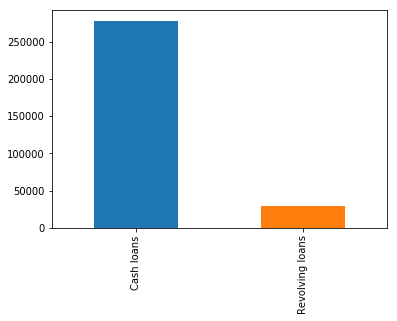

In [10]:
user_df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')

### CODE_GENDER

In [11]:
user_df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [12]:
user_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

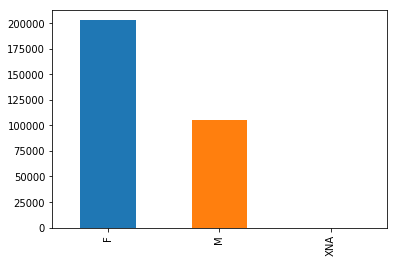

In [13]:
user_df['CODE_GENDER'].value_counts().plot(kind='bar')

### FLAG_OWN_CAR

In [14]:
user_df['FLAG_OWN_CAR'].unique()

array(['N', 'Y'], dtype=object)

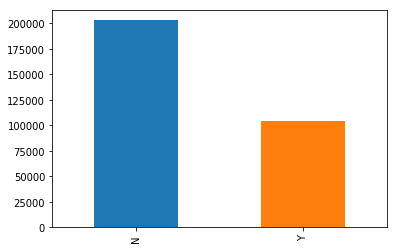

In [15]:
user_df['FLAG_OWN_CAR'].value_counts().plot(kind='bar')

### FLAG_OWN_REALTY

In [16]:
user_df['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

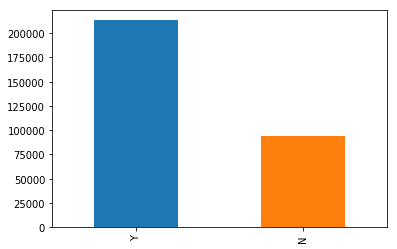

In [17]:
user_df['FLAG_OWN_REALTY'].value_counts().plot(kind='bar')

### CNT_CHILDREN

In [18]:
user_df['CNT_CHILDREN'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14])

In [19]:
user_df['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [20]:
(user_df['CNT_CHILDREN'] > 10).value_counts()

False    307503
True          8
Name: CNT_CHILDREN, dtype: int64

In [21]:
user_df['CNT_CHILDREN'].value_counts(sort=False)

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: CNT_CHILDREN, dtype: int64

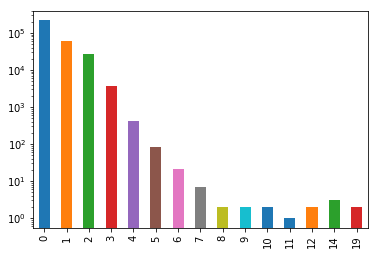

In [22]:
user_df['CNT_CHILDREN'].value_counts(sort=False).plot(kind='bar', logy=True, use_index=True)

### AMT_INCOME_TOTAL

In [23]:
user_df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

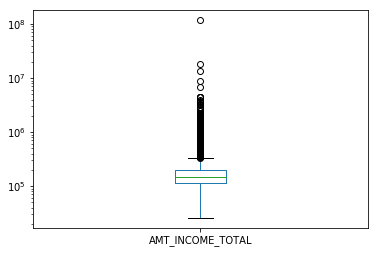

In [24]:
user_df['AMT_INCOME_TOTAL'].plot(kind='box', logy=True)

### AMT_CREDIT

In [25]:
user_df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

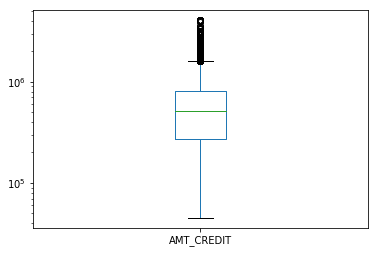

In [26]:
user_df['AMT_CREDIT'].plot(kind='box', logy=True)

### AMT_ANNUITY

In [27]:
user_df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [28]:
user_df['AMT_ANNUITY'].isnull().value_counts()

False    307499
True         12
Name: AMT_ANNUITY, dtype: int64

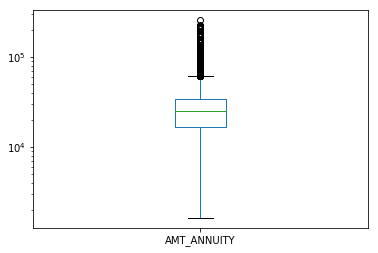

In [29]:
user_df['AMT_ANNUITY'].plot(kind='box', logy=True)

### AMT_GOODS_PRICE

In [30]:
user_df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [31]:
user_df['AMT_GOODS_PRICE'].isnull().value_counts()

False    307233
True        278
Name: AMT_GOODS_PRICE, dtype: int64

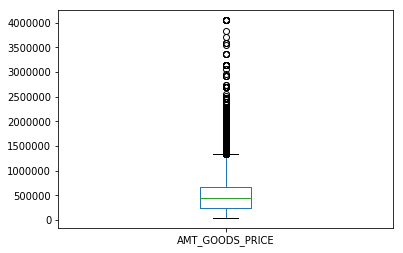

In [32]:
user_df['AMT_GOODS_PRICE'].plot(kind='box')

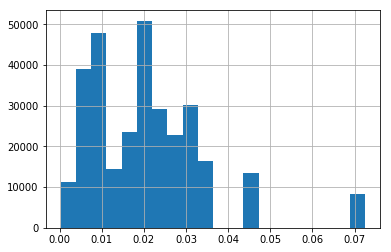

In [33]:
user_df['REGION_POPULATION_RELATIVE'].hist(bins=20)

### DAYS_BIRTH

In [34]:
user_df['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [35]:
user_df['DAYS_BIRTH'].isnull().value_counts()

False    307511
Name: DAYS_BIRTH, dtype: int64

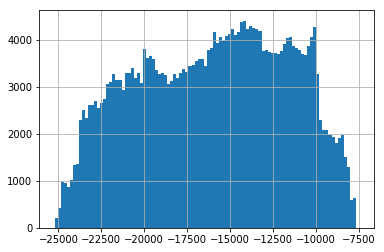

In [36]:
user_df['DAYS_BIRTH'].hist(bins=100)

### DAYS_EMPLOYED

In [37]:
user_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [38]:
user_df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [39]:
user_df['DAYS_EMPLOYED'].isnull().value_counts()

False    307511
Name: DAYS_EMPLOYED, dtype: int64

In [40]:
user_df['DAYS_EMPLOYED'][user_df['DAYS_EMPLOYED'] > 0].count()

55374

In [41]:
user_df['DAYS_EMPLOYED'][user_df['DAYS_EMPLOYED'] == 365243].count()

55374

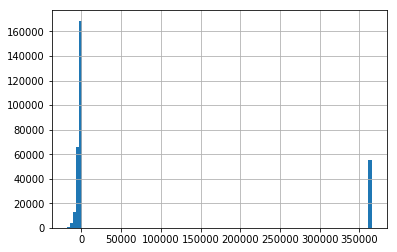

In [42]:
user_df['DAYS_EMPLOYED'].hist(bins=100)

### DAYS_REGISTRATION

In [43]:
user_df['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [44]:
user_df['DAYS_REGISTRATION'].isnull().value_counts()

False    307511
Name: DAYS_REGISTRATION, dtype: int64

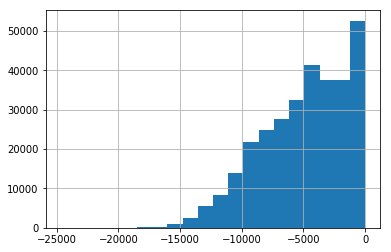

In [45]:
user_df['DAYS_REGISTRATION'].hist(bins=20)

### DAYS_ID_PUBLISH

In [46]:
user_df['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [47]:
user_df['DAYS_ID_PUBLISH'].isnull().value_counts()

False    307511
Name: DAYS_ID_PUBLISH, dtype: int64

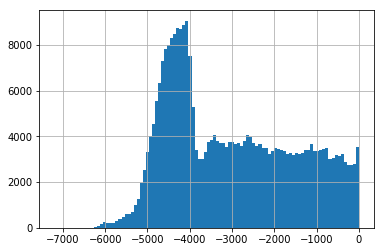

In [48]:
user_df['DAYS_ID_PUBLISH'].hist(bins=100)

### OWN_CAR_AGE

In [49]:
user_df['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [50]:
user_df['OWN_CAR_AGE'].isnull().value_counts()

True     202929
False    104582
Name: OWN_CAR_AGE, dtype: int64

In [51]:
user_df['OWN_CAR_AGE'][user_df['OWN_CAR_AGE'] > 20].count()

13054

In [52]:
user_df['OWN_CAR_AGE'][user_df['OWN_CAR_AGE'] > 60].count()

3339

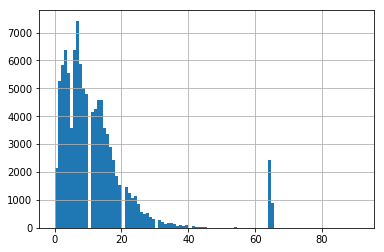

In [53]:
user_df['OWN_CAR_AGE'].hist(bins=100)

### FLAG_MOBIL

In [54]:
user_df['FLAG_MOBIL'].describe()

count    307511.000000
mean          0.999997
std           0.001803
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_MOBIL, dtype: float64

In [55]:
user_df['FLAG_MOBIL'].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

### FLAG_EMP_PHONE

In [56]:
user_df['FLAG_EMP_PHONE'].describe()

count    307511.000000
mean          0.819889
std           0.384280
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_EMP_PHONE, dtype: float64

In [57]:
user_df['FLAG_EMP_PHONE'].value_counts()

1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64

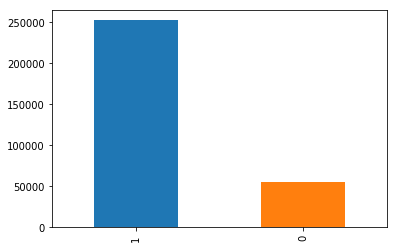

In [58]:
user_df['FLAG_EMP_PHONE'].value_counts().plot(kind='bar')

### FLAG_WORK_PHONE

In [59]:
user_df['FLAG_WORK_PHONE'].describe()

count    307511.000000
mean          0.199368
std           0.399526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_WORK_PHONE, dtype: float64

In [60]:
user_df['FLAG_WORK_PHONE'].value_counts()

0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64

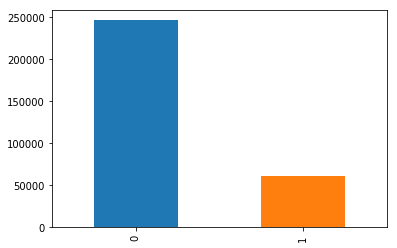

In [61]:
user_df['FLAG_WORK_PHONE'].value_counts().plot(kind='bar')

### FLAG_CONT_MOBILE

In [62]:
user_df['FLAG_CONT_MOBILE'].describe()

count    307511.000000
mean          0.998133
std           0.043164
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_CONT_MOBILE, dtype: float64

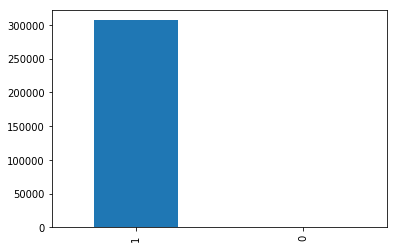

In [63]:
user_df['FLAG_CONT_MOBILE'].value_counts().plot(kind='bar')

### FLAG_PHONE

In [64]:
user_df['FLAG_PHONE'].describe()

count    307511.000000
mean          0.281066
std           0.449521
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLAG_PHONE, dtype: float64

In [65]:
user_df['FLAG_PHONE'].isnull().value_counts()

False    307511
Name: FLAG_PHONE, dtype: int64

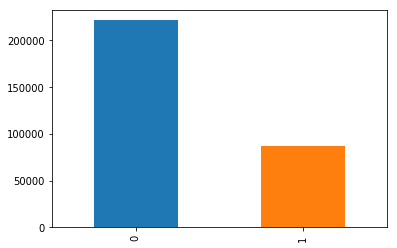

In [66]:
user_df['FLAG_PHONE'].value_counts().plot(kind='bar')

### FLAG_EMAIL

In [67]:
user_df['FLAG_EMAIL'].describe()

count    307511.000000
mean          0.056720
std           0.231307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_EMAIL, dtype: float64

In [68]:
user_df['FLAG_EMAIL'].isnull().value_counts()

False    307511
Name: FLAG_EMAIL, dtype: int64

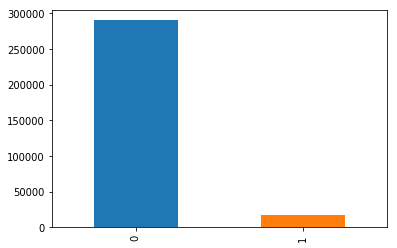

In [69]:
user_df['FLAG_EMAIL'].value_counts().plot(kind='bar')

### OCCUPATION_TYPE

In [70]:
user_df['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [71]:
user_df['OCCUPATION_TYPE'].isnull().value_counts()

False    211120
True      96391
Name: OCCUPATION_TYPE, dtype: int64

In [72]:
user_df['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

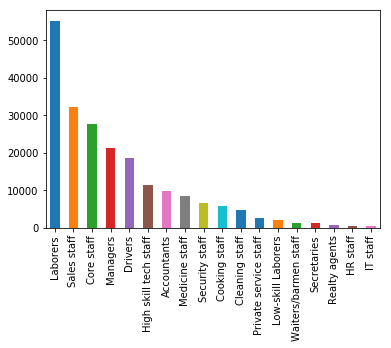

In [73]:
user_df['OCCUPATION_TYPE'].value_counts().plot(kind='bar')

### CNT_FAM_MEMBERS

In [74]:
user_df['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [75]:
user_df['CNT_FAM_MEMBERS'].isnull().value_counts()

False    307509
True          2
Name: CNT_FAM_MEMBERS, dtype: int64

In [76]:
user_df['CNT_FAM_MEMBERS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

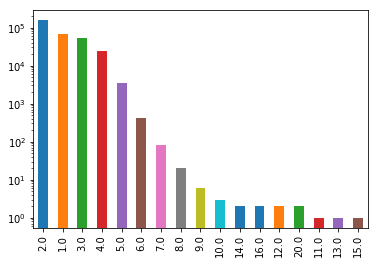

In [77]:
user_df['CNT_FAM_MEMBERS'].value_counts().plot(kind='bar', logy=True)

### REGION_RATING_CLIENT

In [78]:
user_df['REGION_RATING_CLIENT'].describe()

count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64

In [79]:
user_df['REGION_RATING_CLIENT'].unique()

array([2, 1, 3])

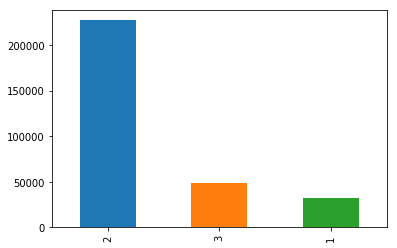

In [80]:
user_df['REGION_RATING_CLIENT'].value_counts().plot(kind='bar')

### REGION_RATING_CLIENT_W_CITY

In [81]:
user_df['REGION_RATING_CLIENT_W_CITY'].describe()

count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [82]:
user_df['REGION_RATING_CLIENT_W_CITY'].unique()

array([2, 1, 3])

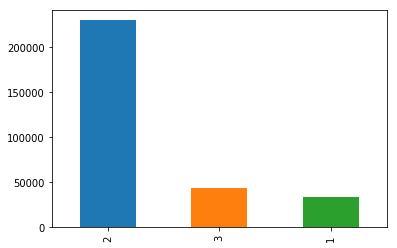

In [83]:
user_df['REGION_RATING_CLIENT_W_CITY'].value_counts().plot(kind='bar')

### WEEKDAY_APPR_PROCESS_START

In [84]:
user_df['WEEKDAY_APPR_PROCESS_START'].describe()

count      307511
unique          7
top       TUESDAY
freq        53901
Name: WEEKDAY_APPR_PROCESS_START, dtype: object

In [85]:
user_df['WEEKDAY_APPR_PROCESS_START'].isnull().value_counts()

False    307511
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

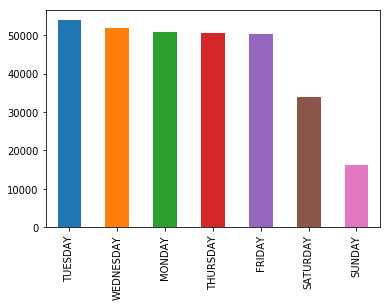

In [86]:
user_df['WEEKDAY_APPR_PROCESS_START'].value_counts().plot(kind='bar')

### HOUR_APPR_PROCESS_START

In [87]:
user_df['HOUR_APPR_PROCESS_START'].describe()

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

In [88]:
user_df['HOUR_APPR_PROCESS_START'].isnull().value_counts()

False    307511
Name: HOUR_APPR_PROCESS_START, dtype: int64

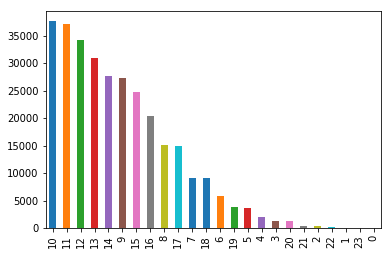

In [89]:
user_df['HOUR_APPR_PROCESS_START'].value_counts().plot(kind='bar')

### REG_REGION_NOT_LIVE_REGION

In [90]:
user_df['REG_REGION_NOT_LIVE_REGION'].describe()

count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

In [91]:
user_df['REG_REGION_NOT_LIVE_REGION'].isnull().value_counts()

False    307511
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

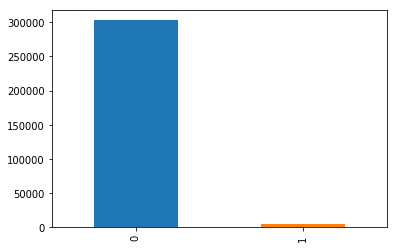

In [92]:
user_df['REG_REGION_NOT_LIVE_REGION'].value_counts().plot(kind='bar')

### REG_REGION_NOT_WORK_REGION

In [93]:
user_df['REG_REGION_NOT_WORK_REGION'].describe()

count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

In [94]:
user_df['REG_REGION_NOT_WORK_REGION'].isnull().value_counts()

False    307511
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

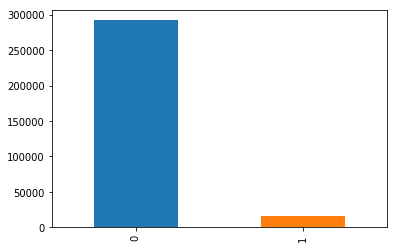

In [95]:
user_df['REG_REGION_NOT_WORK_REGION'].value_counts().plot(kind='bar')

### LIVE_REGION_NOT_WORK_REGION

In [96]:
user_df['LIVE_REGION_NOT_WORK_REGION'].describe()

count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64

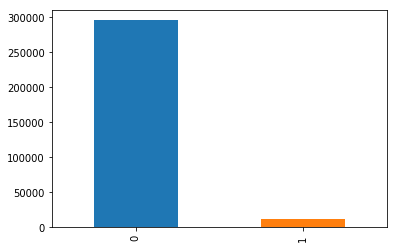

In [97]:
user_df['LIVE_REGION_NOT_WORK_REGION'].value_counts().plot(kind='bar')

### REG_CITY_NOT_LIVE_CITY

In [98]:
user_df['REG_CITY_NOT_LIVE_CITY'].describe()

count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64

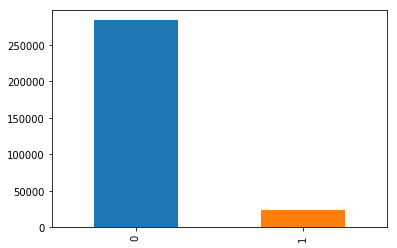

In [99]:
user_df['REG_CITY_NOT_LIVE_CITY'].value_counts().plot(kind='bar')

### REG_CITY_NOT_WORK_CITY

In [100]:
user_df['REG_CITY_NOT_WORK_CITY'].describe()

count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64

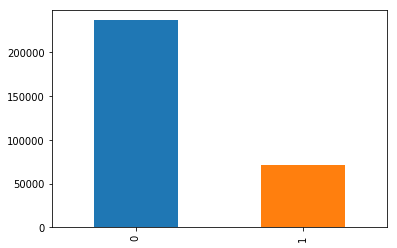

In [101]:
user_df['REG_CITY_NOT_WORK_CITY'].value_counts().plot(kind='bar')

### LIVE_CITY_NOT_WORK_CITY

In [102]:
user_df['LIVE_CITY_NOT_WORK_CITY'].describe()

count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

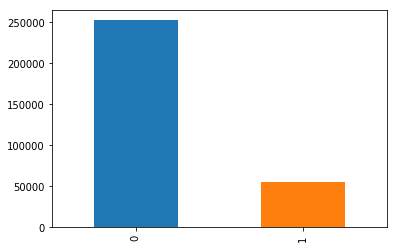

In [103]:
user_df['LIVE_CITY_NOT_WORK_CITY'].value_counts().plot(kind='bar')

### ORGANIZATION_TYPE

In [104]:
user_df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [105]:
user_df['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [106]:
user_df['ORGANIZATION_TYPE'].isnull().value_counts()

False    307511
Name: ORGANIZATION_TYPE, dtype: int64

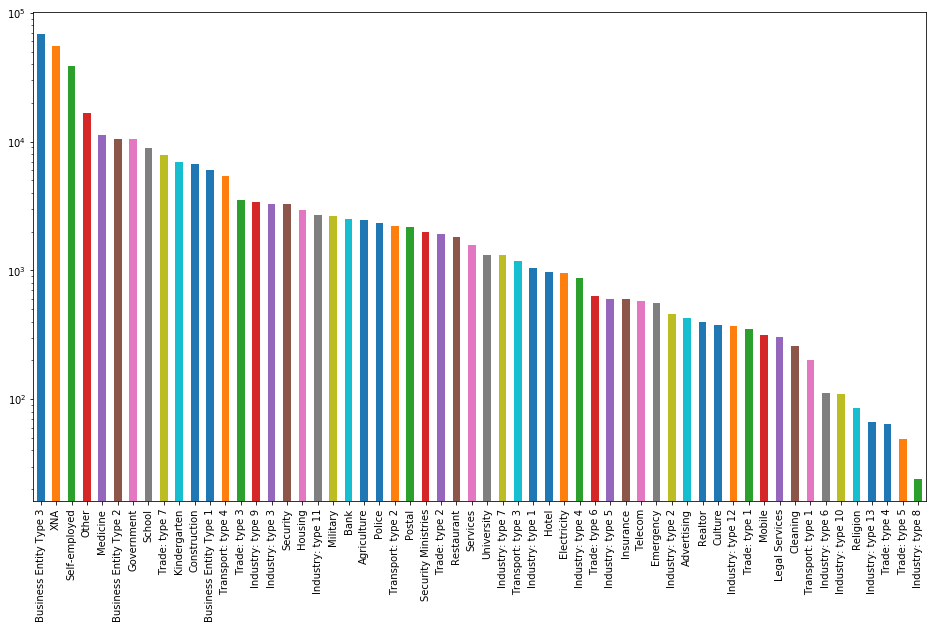

In [107]:
user_df['ORGANIZATION_TYPE'].value_counts().plot(kind='bar', figsize=[16, 9], logy=True)

### EXT_SOURCE_1

In [108]:
user_df['EXT_SOURCE_1'].describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [109]:
user_df['EXT_SOURCE_1'].isnull().value_counts()

True     173378
False    134133
Name: EXT_SOURCE_1, dtype: int64

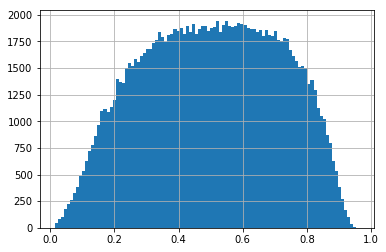

In [110]:
user_df['EXT_SOURCE_1'].hist(bins=100)

### EXT_SOURCE_2

In [111]:
user_df['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [112]:
user_df['EXT_SOURCE_2'].isnull().value_counts()

False    306851
True        660
Name: EXT_SOURCE_2, dtype: int64

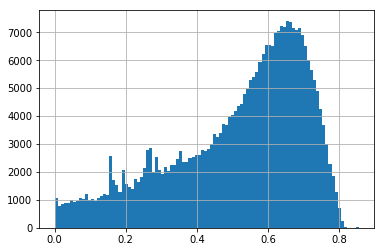

In [113]:
user_df['EXT_SOURCE_2'].hist(bins=100)

### EXT_SOURCE_3

In [114]:
user_df['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [115]:
user_df['EXT_SOURCE_3'].isnull().value_counts()

False    246546
True      60965
Name: EXT_SOURCE_3, dtype: int64

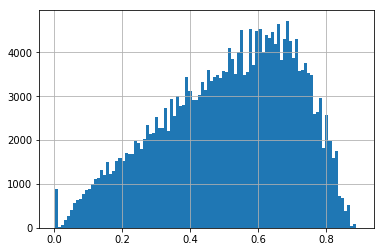

In [116]:
user_df['EXT_SOURCE_3'].hist(bins=100)

## Building Information

### APARTMENTS_AVG

In [117]:
user_df['APARTMENTS_AVG'].describe()

count    151450.00000
mean          0.11744
std           0.10824
min           0.00000
25%           0.05770
50%           0.08760
75%           0.14850
max           1.00000
Name: APARTMENTS_AVG, dtype: float64

In [118]:
user_df['APARTMENTS_AVG'].isnull().value_counts()

True     156061
False    151450
Name: APARTMENTS_AVG, dtype: int64

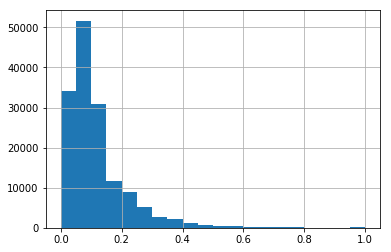

In [119]:
user_df['APARTMENTS_AVG'].hist(bins=20)

### BASEMENTAREA_AVG

In [120]:
user_df['BASEMENTAREA_AVG'].describe()

count    127568.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64

In [121]:
user_df['BASEMENTAREA_AVG'].isnull().value_counts()

True     179943
False    127568
Name: BASEMENTAREA_AVG, dtype: int64

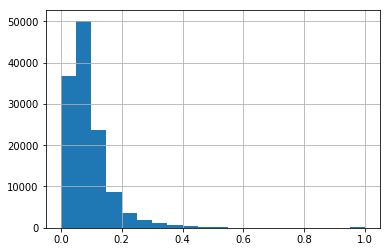

In [122]:
user_df['BASEMENTAREA_AVG'].hist(bins=20)

### YEARS_BEGINEXPLUATATION_AVG

In [123]:
user_df['YEARS_BEGINEXPLUATATION_AVG'].describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [124]:
user_df['YEARS_BEGINEXPLUATATION_AVG'].isnull().value_counts()

False    157504
True     150007
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: int64

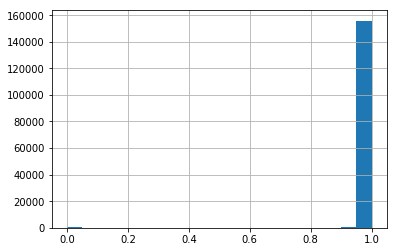

In [125]:
user_df['YEARS_BEGINEXPLUATATION_AVG'].hist(bins=20)

### YEARS_BUILD_AVG

In [126]:
user_df['YEARS_BUILD_AVG'].describe()

count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64

In [127]:
user_df['YEARS_BUILD_AVG'].isnull().value_counts()

True     204488
False    103023
Name: YEARS_BUILD_AVG, dtype: int64

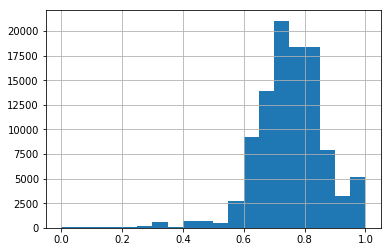

In [128]:
user_df['YEARS_BUILD_AVG'].hist(bins=20)

### COMMONAREA_AVG

In [129]:
user_df['COMMONAREA_AVG'].describe()

count    92646.000000
mean         0.044621
std          0.076036
min          0.000000
25%          0.007800
50%          0.021100
75%          0.051500
max          1.000000
Name: COMMONAREA_AVG, dtype: float64

In [130]:
user_df['COMMONAREA_AVG'].isnull().value_counts()

True     214865
False     92646
Name: COMMONAREA_AVG, dtype: int64

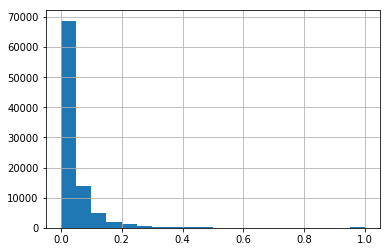

In [131]:
user_df['COMMONAREA_AVG'].hist(bins=20)

### ELEVATORS_AVG

In [132]:
user_df['ELEVATORS_AVG'].describe()

count    143620.000000
mean          0.078942
std           0.134576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64

In [133]:
user_df['ELEVATORS_AVG'].isnull().value_counts()

True     163891
False    143620
Name: ELEVATORS_AVG, dtype: int64

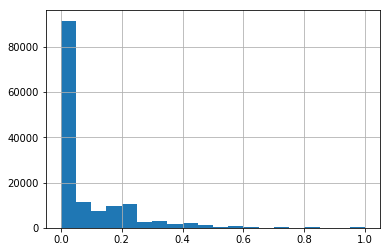

In [134]:
user_df['ELEVATORS_AVG'].hist(bins=20)

### ENTRANCES_AVG

In [135]:
user_df['ENTRANCES_AVG'].describe()

count    152683.000000
mean          0.149725
std           0.100049
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64

In [136]:
user_df['ENTRANCES_AVG'].isnull().value_counts()

True     154828
False    152683
Name: ENTRANCES_AVG, dtype: int64

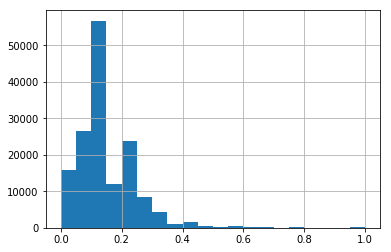

In [137]:
user_df['ENTRANCES_AVG'].hist(bins=20)

### FLOORSMAX_AVG

In [138]:
user_df['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [139]:
user_df['FLOORSMAX_AVG'].isnull().value_counts()

False    154491
True     153020
Name: FLOORSMAX_AVG, dtype: int64

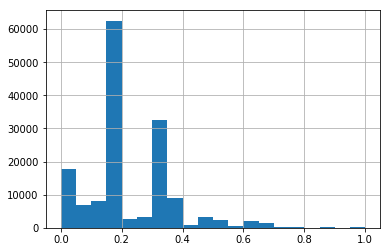

In [140]:
user_df['FLOORSMAX_AVG'].hist(bins=20)

### FLOORSMIN_AVG

In [141]:
user_df['FLOORSMIN_AVG'].describe()

count    98869.000000
mean         0.231894
std          0.161380
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64

In [142]:
user_df['FLOORSMIN_AVG'].isnull().value_counts()

True     208642
False     98869
Name: FLOORSMIN_AVG, dtype: int64

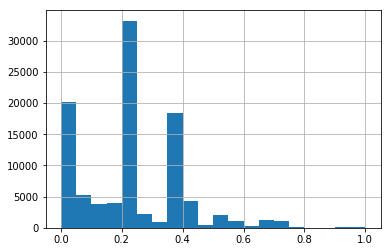

In [143]:
user_df['FLOORSMIN_AVG'].hist(bins=20)

### LANDAREA_AVG

In [144]:
user_df['LANDAREA_AVG'].describe()

count    124921.000000
mean          0.066333
std           0.081184
min           0.000000
25%           0.018700
50%           0.048100
75%           0.085600
max           1.000000
Name: LANDAREA_AVG, dtype: float64

In [145]:
user_df['LANDAREA_AVG'].isnull().value_counts()

True     182590
False    124921
Name: LANDAREA_AVG, dtype: int64

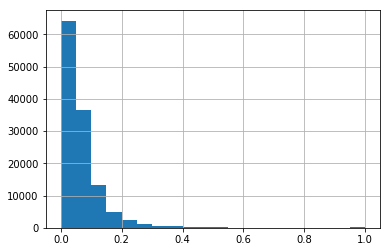

In [146]:
user_df['LANDAREA_AVG'].hist(bins=20)

### LIVINGAPARTMENTS_AVG

In [147]:
user_df['LIVINGAPARTMENTS_AVG'].describe()

count    97312.000000
mean         0.100775
std          0.092576
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64

In [148]:
user_df['LIVINGAPARTMENTS_AVG'].isnull().value_counts()

True     210199
False     97312
Name: LIVINGAPARTMENTS_AVG, dtype: int64

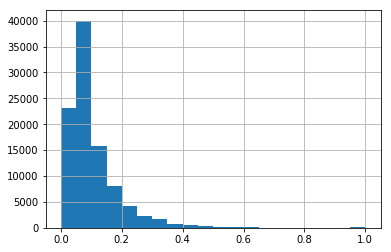

In [149]:
user_df['LIVINGAPARTMENTS_AVG'].hist(bins=20)

### LIVINGAREA_AVG

In [150]:
user_df['LIVINGAREA_AVG'].describe()

count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64

In [151]:
user_df['LIVINGAREA_AVG'].isnull().value_counts()

True     154350
False    153161
Name: LIVINGAREA_AVG, dtype: int64

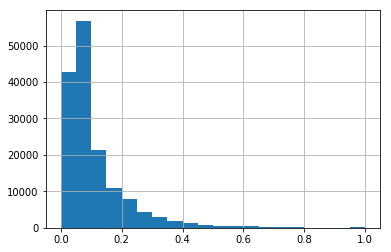

In [152]:
user_df['LIVINGAREA_AVG'].hist(bins=20)

### NONLIVINGAPARTMENTS_AVG

In [153]:
user_df['NONLIVINGAPARTMENTS_AVG'].describe()

count    93997.000000
mean         0.008809
std          0.047732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64

In [154]:
user_df['NONLIVINGAPARTMENTS_AVG'].isnull().value_counts()

True     213514
False     93997
Name: NONLIVINGAPARTMENTS_AVG, dtype: int64

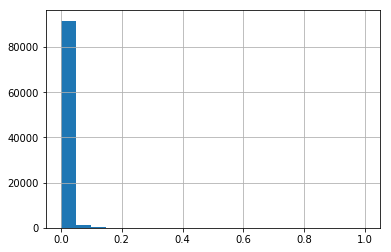

In [155]:
user_df['NONLIVINGAPARTMENTS_AVG'].hist(bins=20)

### NONLIVINGAREA_AVG

In [156]:
user_df['NONLIVINGAREA_AVG'].describe()

count    137829.000000
mean          0.028358
std           0.069523
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027700
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64

In [157]:
user_df['NONLIVINGAREA_AVG'].isnull().value_counts()

True     169682
False    137829
Name: NONLIVINGAREA_AVG, dtype: int64

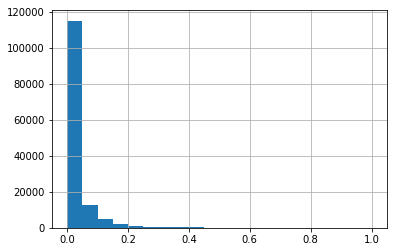

In [158]:
user_df['NONLIVINGAREA_AVG'].hist(bins=20)

### APARTMENTS_MODE

In [159]:
user_df['APARTMENTS_MODE'].describe()

count    151450.000000
mean          0.114231
std           0.107936
min           0.000000
25%           0.052500
50%           0.084000
75%           0.143900
max           1.000000
Name: APARTMENTS_MODE, dtype: float64

In [160]:
user_df['APARTMENTS_MODE'].isnull().value_counts()

True     156061
False    151450
Name: APARTMENTS_MODE, dtype: int64

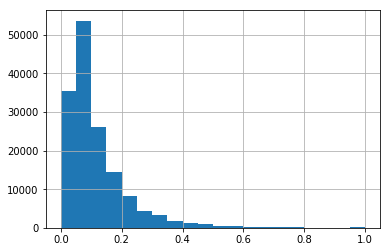

In [161]:
user_df['APARTMENTS_MODE'].hist(bins=20)

### BASEMENTAREA_MODE

In [162]:
user_df['BASEMENTAREA_MODE'].describe()

count    127568.000000
mean          0.087543
std           0.084307
min           0.000000
25%           0.040700
50%           0.074600
75%           0.112400
max           1.000000
Name: BASEMENTAREA_MODE, dtype: float64

In [163]:
user_df['BASEMENTAREA_MODE'].isnull().value_counts()

True     179943
False    127568
Name: BASEMENTAREA_MODE, dtype: int64

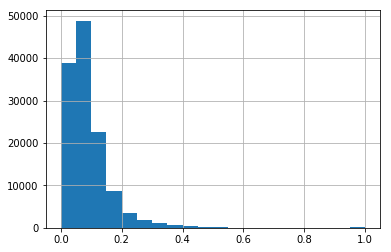

In [164]:
user_df['BASEMENTAREA_MODE'].hist(bins=20)

### YEARS_BEGINEXPLUATATION_MODE

In [165]:
user_df['YEARS_BEGINEXPLUATATION_MODE'].describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [166]:
user_df['YEARS_BEGINEXPLUATATION_MODE'].isnull().value_counts()

False    157504
True     150007
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: int64

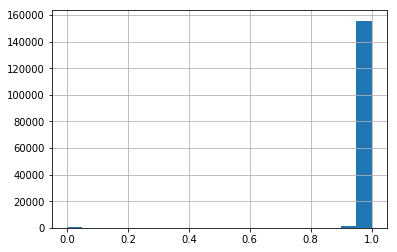

In [167]:
user_df['YEARS_BEGINEXPLUATATION_MODE'].hist(bins=20)

### YEARS_BUILD_MODE

In [168]:
user_df['COMMONAREA_MODE'].describe()

count    92646.000000
mean         0.042553
std          0.074445
min          0.000000
25%          0.007200
50%          0.019000
75%          0.049000
max          1.000000
Name: COMMONAREA_MODE, dtype: float64

In [169]:
user_df['COMMONAREA_MODE'].isnull().value_counts()

True     214865
False     92646
Name: COMMONAREA_MODE, dtype: int64

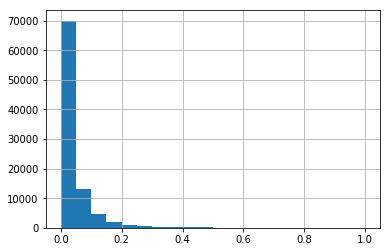

In [170]:
user_df['COMMONAREA_MODE'].hist(bins=20)

### ELEVATORS_MODE

In [171]:
user_df['ELEVATORS_MODE'].describe()

count    143620.000000
mean          0.074490
std           0.132256
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120800
max           1.000000
Name: ELEVATORS_MODE, dtype: float64

In [172]:
user_df['ELEVATORS_MODE'].isnull().value_counts()

True     163891
False    143620
Name: ELEVATORS_MODE, dtype: int64

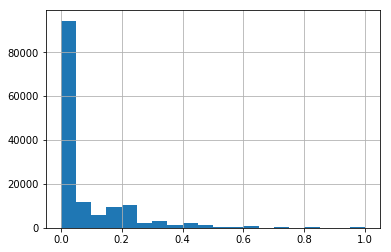

In [173]:
user_df['ELEVATORS_MODE'].hist(bins=20)

### ENTRANCES_MODE

In [174]:
user_df['ENTRANCES_MODE'].describe()

count    152683.000000
mean          0.145193
std           0.100977
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MODE, dtype: float64

In [175]:
user_df['ENTRANCES_MODE'].isnull().value_counts()

True     154828
False    152683
Name: ENTRANCES_MODE, dtype: int64

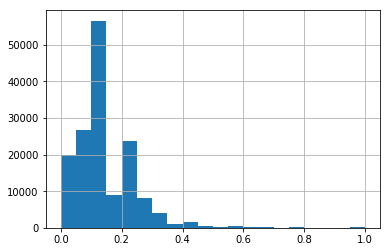

In [176]:
user_df['ENTRANCES_MODE'].hist(bins=20)

### FLOORSMAX_MODE

In [177]:
user_df['FLOORSMAX_MODE'].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

In [178]:
user_df['FLOORSMAX_MODE'].isnull().value_counts()

False    154491
True     153020
Name: FLOORSMAX_MODE, dtype: int64

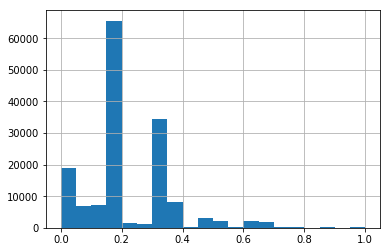

In [179]:
user_df['FLOORSMAX_MODE'].hist(bins=20)

### FLOORSMIN_MODE

In [180]:
user_df['FLOORSMIN_MODE'].describe()

count    98869.000000
mean         0.228058
std          0.161160
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MODE, dtype: float64

In [181]:
user_df['FLOORSMIN_MODE'].isnull().value_counts()

True     208642
False     98869
Name: FLOORSMIN_MODE, dtype: int64

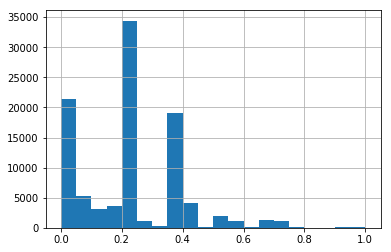

In [182]:
user_df['FLOORSMIN_MODE'].hist(bins=20)

### LANDAREA_MODE

In [183]:
user_df['LANDAREA_MODE'].describe()

count    124921.000000
mean          0.064958
std           0.081750
min           0.000000
25%           0.016600
50%           0.045800
75%           0.084100
max           1.000000
Name: LANDAREA_MODE, dtype: float64

In [184]:
user_df['LANDAREA_MODE'].isnull().value_counts()

True     182590
False    124921
Name: LANDAREA_MODE, dtype: int64

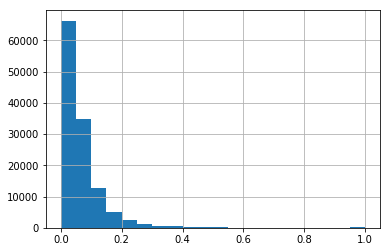

In [185]:
user_df['LANDAREA_MODE'].hist(bins=20)

### LIVINGAPARTMENTS_MODE

In [186]:
user_df['LIVINGAPARTMENTS_MODE'].describe()

count    97312.000000
mean         0.105645
std          0.097880
min          0.000000
25%          0.054200
50%          0.077100
75%          0.131300
max          1.000000
Name: LIVINGAPARTMENTS_MODE, dtype: float64

In [187]:
user_df['LIVINGAPARTMENTS_MODE'].isnull().value_counts()

True     210199
False     97312
Name: LIVINGAPARTMENTS_MODE, dtype: int64

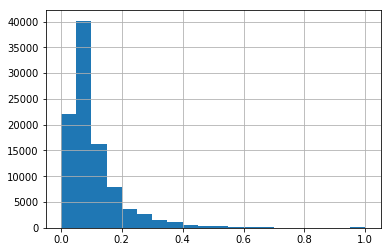

In [188]:
user_df['LIVINGAPARTMENTS_MODE'].hist(bins=20)

### LIVINGAREA_MODE

In [189]:
user_df['LIVINGAREA_MODE'].describe()

count    153161.000000
mean          0.105975
std           0.111845
min           0.000000
25%           0.042700
50%           0.073100
75%           0.125200
max           1.000000
Name: LIVINGAREA_MODE, dtype: float64

In [190]:
user_df['LIVINGAREA_MODE'].isnull().value_counts()

True     154350
False    153161
Name: LIVINGAREA_MODE, dtype: int64

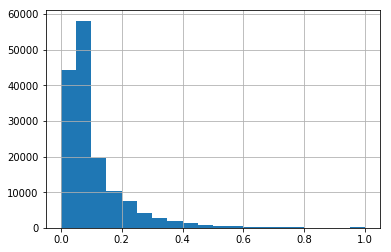

In [191]:
user_df['LIVINGAREA_MODE'].hist(bins=20)

### NONLIVINGAPARTMENTS_MODE

In [192]:
user_df['NONLIVINGAPARTMENTS_MODE'].describe()

count    93997.000000
mean         0.008076
std          0.046276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64

In [193]:
user_df['NONLIVINGAPARTMENTS_MODE'].isnull().value_counts()

True     213514
False     93997
Name: NONLIVINGAPARTMENTS_MODE, dtype: int64

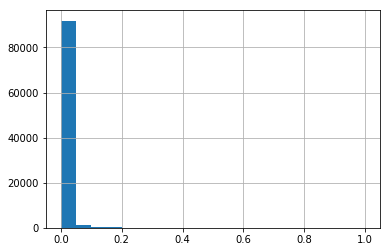

In [194]:
user_df['NONLIVINGAPARTMENTS_MODE'].hist(bins=20)

### NONLIVINGAREA_MODE

In [195]:
user_df['NONLIVINGAREA_MODE'].describe()

count    137829.000000
mean          0.027022
std           0.070254
min           0.000000
25%           0.000000
50%           0.001100
75%           0.023100
max           1.000000
Name: NONLIVINGAREA_MODE, dtype: float64

In [196]:
user_df['NONLIVINGAREA_MODE'].isnull().value_counts()

True     169682
False    137829
Name: NONLIVINGAREA_MODE, dtype: int64

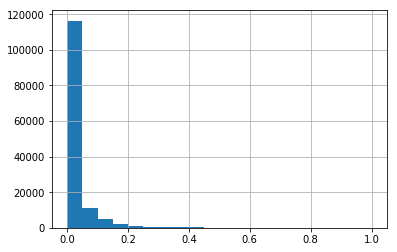

In [197]:
user_df['NONLIVINGAREA_MODE'].hist(bins=20)

### APARTMENTS_MEDI

In [198]:
user_df['APARTMENTS_MEDI'].describe()

count    151450.000000
mean          0.117850
std           0.109076
min           0.000000
25%           0.058300
50%           0.086400
75%           0.148900
max           1.000000
Name: APARTMENTS_MEDI, dtype: float64

In [199]:
user_df['APARTMENTS_MEDI'].isnull().value_counts()

True     156061
False    151450
Name: APARTMENTS_MEDI, dtype: int64

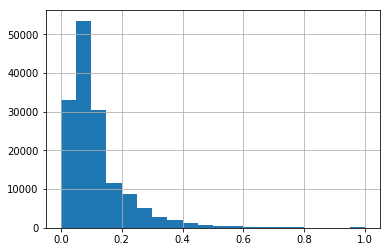

In [200]:
user_df['APARTMENTS_MEDI'].hist(bins=20)

### BASEMENTAREA_MEDI

In [201]:
user_df['BASEMENTAREA_MEDI'].describe()

count    127568.000000
mean          0.087955
std           0.082179
min           0.000000
25%           0.043700
50%           0.075800
75%           0.111600
max           1.000000
Name: BASEMENTAREA_MEDI, dtype: float64

In [202]:
user_df['BASEMENTAREA_MEDI'].isnull().value_counts()

True     179943
False    127568
Name: BASEMENTAREA_MEDI, dtype: int64

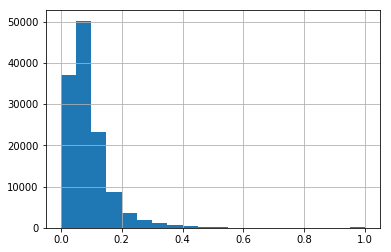

In [203]:
user_df['BASEMENTAREA_MEDI'].hist(bins=20)

### YEARS_BEGINEXPLUATATION_MEDI

In [204]:
user_df['YEARS_BEGINEXPLUATATION_MEDI'].describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [205]:
user_df['YEARS_BEGINEXPLUATATION_MEDI'].isnull().value_counts()

False    157504
True     150007
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: int64

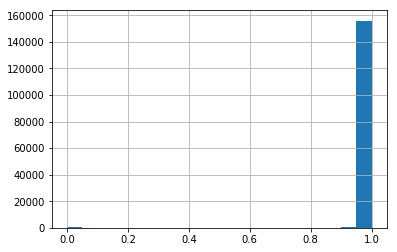

In [206]:
user_df['YEARS_BEGINEXPLUATATION_MEDI'].hist(bins=20)

### YEARS_BUILD_MEDI

In [207]:
user_df['YEARS_BUILD_MEDI'].describe()

count    103023.000000
mean          0.755746
std           0.112066
min           0.000000
25%           0.691400
50%           0.758500
75%           0.825600
max           1.000000
Name: YEARS_BUILD_MEDI, dtype: float64

In [208]:
user_df['YEARS_BUILD_MEDI'].isnull().value_counts()

True     204488
False    103023
Name: YEARS_BUILD_MEDI, dtype: int64

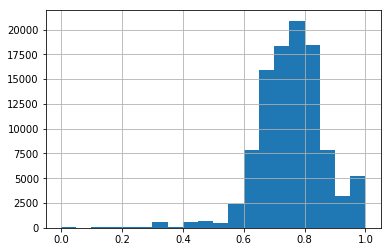

In [209]:
user_df['YEARS_BUILD_MEDI'].hist(bins=20)

### COMMONAREA_MEDI

In [210]:
user_df['COMMONAREA_MEDI'].describe()

count    92646.000000
mean         0.044595
std          0.076144
min          0.000000
25%          0.007900
50%          0.020800
75%          0.051300
max          1.000000
Name: COMMONAREA_MEDI, dtype: float64

In [211]:
user_df['COMMONAREA_MEDI'].isnull().value_counts()

True     214865
False     92646
Name: COMMONAREA_MEDI, dtype: int64

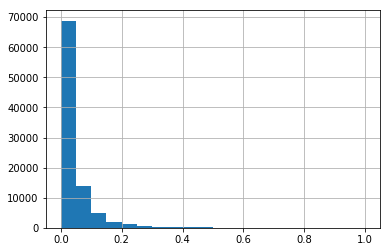

In [212]:
user_df['COMMONAREA_MEDI'].hist(bins=20)

### ELEVATORS_MEDI

In [213]:
user_df['ELEVATORS_MEDI'].describe()

count    143620.000000
mean          0.078078
std           0.134467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_MEDI, dtype: float64

In [214]:
user_df['ELEVATORS_MEDI'].isnull().value_counts()

True     163891
False    143620
Name: ELEVATORS_MEDI, dtype: int64

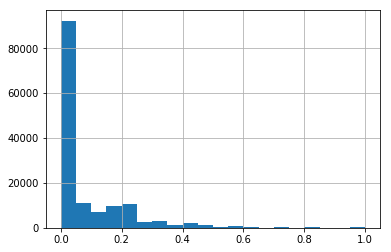

In [215]:
user_df['ELEVATORS_MEDI'].hist(bins=20)

### ENTRANCES_MEDI

In [216]:
user_df['ENTRANCES_MEDI'].describe()

count    152683.000000
mean          0.149213
std           0.100368
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MEDI, dtype: float64

In [217]:
user_df['ENTRANCES_MEDI'].isnull().value_counts()

True     154828
False    152683
Name: ENTRANCES_MEDI, dtype: int64

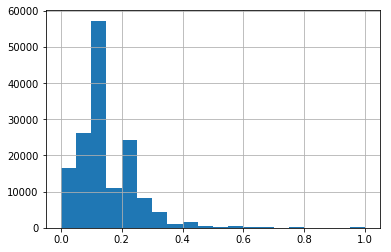

In [218]:
user_df['ENTRANCES_MEDI'].hist(bins=20)

### FLOORSMAX_MEDI

In [219]:
user_df['FLOORSMAX_MEDI'].describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

In [220]:
user_df['FLOORSMAX_MEDI'].isnull().value_counts()

False    154491
True     153020
Name: FLOORSMAX_MEDI, dtype: int64

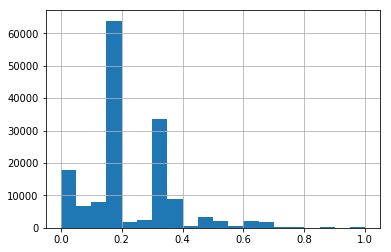

In [221]:
user_df['FLOORSMAX_MEDI'].hist(bins=20)

### FLOORSMIN_MEDI

In [222]:
user_df['FLOORSMIN_MEDI'].describe()

count    98869.000000
mean         0.231625
std          0.161934
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MEDI, dtype: float64

In [223]:
user_df['FLOORSMIN_MEDI'].isnull().value_counts()

True     208642
False     98869
Name: FLOORSMIN_MEDI, dtype: int64

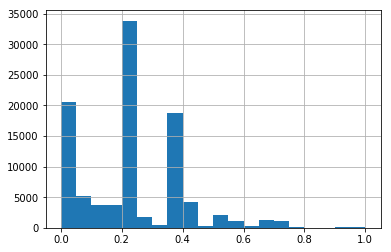

In [224]:
user_df['FLOORSMIN_MEDI'].hist(bins=20)

### LANDAREA_MEDI

In [225]:
user_df['LANDAREA_MEDI'].describe()

count    124921.000000
mean          0.067169
std           0.082167
min           0.000000
25%           0.018700
50%           0.048700
75%           0.086800
max           1.000000
Name: LANDAREA_MEDI, dtype: float64

In [226]:
user_df['LANDAREA_MEDI'].isnull().value_counts()

True     182590
False    124921
Name: LANDAREA_MEDI, dtype: int64

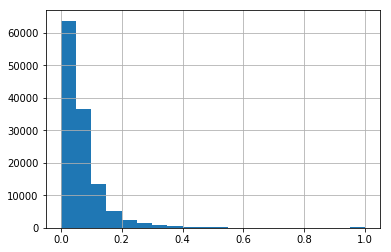

In [227]:
user_df['LANDAREA_MEDI'].hist(bins=20)

### LIVINGAPARTMENTS_MEDI

In [228]:
user_df['LIVINGAPARTMENTS_MEDI'].describe()

count    97312.000000
mean         0.101954
std          0.093642
min          0.000000
25%          0.051300
50%          0.076100
75%          0.123100
max          1.000000
Name: LIVINGAPARTMENTS_MEDI, dtype: float64

In [229]:
user_df['LIVINGAPARTMENTS_MEDI'].isnull().value_counts()

True     210199
False     97312
Name: LIVINGAPARTMENTS_MEDI, dtype: int64

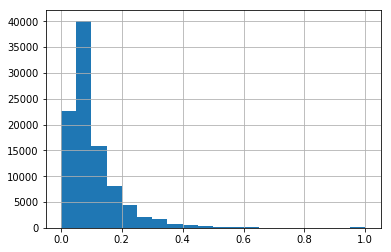

In [230]:
user_df['LIVINGAPARTMENTS_MEDI'].hist(bins=20)

### LIVINGAREA_MEDI

In [231]:
user_df['LIVINGAREA_MEDI'].describe()

count    153161.000000
mean          0.108607
std           0.112260
min           0.000000
25%           0.045700
50%           0.074900
75%           0.130300
max           1.000000
Name: LIVINGAREA_MEDI, dtype: float64

In [232]:
user_df['LIVINGAREA_MEDI'].isnull().value_counts()

True     154350
False    153161
Name: LIVINGAREA_MEDI, dtype: int64

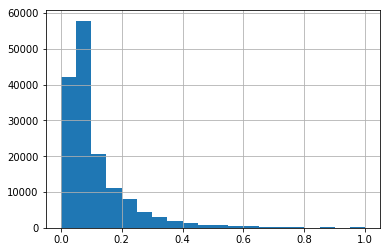

In [233]:
user_df['LIVINGAREA_MEDI'].hist(bins=20)

### NONLIVINGAPARTMENTS_MEDI

In [234]:
user_df['NONLIVINGAPARTMENTS_MEDI'].describe()

count    93997.000000
mean         0.008651
std          0.047415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64

In [235]:
user_df['NONLIVINGAPARTMENTS_MEDI'].isnull().value_counts()

True     213514
False     93997
Name: NONLIVINGAPARTMENTS_MEDI, dtype: int64

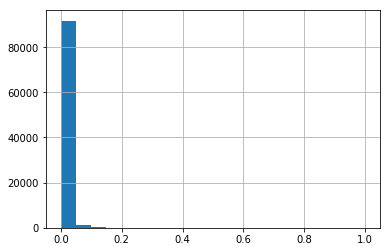

In [236]:
user_df['NONLIVINGAPARTMENTS_MEDI'].hist(bins=20)

### NONLIVINGAREA_MEDI

In [237]:
user_df['NONLIVINGAREA_MEDI'].describe()

count    137829.000000
mean          0.028236
std           0.070166
min           0.000000
25%           0.000000
50%           0.003100
75%           0.026600
max           1.000000
Name: NONLIVINGAREA_MEDI, dtype: float64

In [238]:
user_df['NONLIVINGAREA_MEDI'].isnull().value_counts()

True     169682
False    137829
Name: NONLIVINGAREA_MEDI, dtype: int64

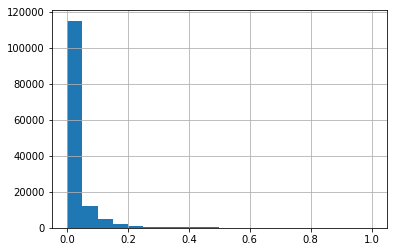

In [239]:
user_df['NONLIVINGAREA_MEDI'].hist(bins=20)

### FONDKAPREMONT_MODE

In [240]:
user_df['FONDKAPREMONT_MODE'].describe()

count                97216
unique                   4
top       reg oper account
freq                 73830
Name: FONDKAPREMONT_MODE, dtype: object

In [241]:
user_df['FONDKAPREMONT_MODE'].value_counts()

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64

In [242]:
user_df['FONDKAPREMONT_MODE'].isnull().value_counts()

True     210295
False     97216
Name: FONDKAPREMONT_MODE, dtype: int64

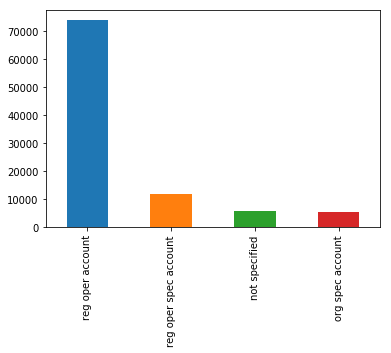

In [243]:
user_df['FONDKAPREMONT_MODE'].value_counts().plot(kind='bar')

### HOUSETYPE_MODE

In [244]:
user_df['HOUSETYPE_MODE'].describe()

count             153214
unique                 3
top       block of flats
freq              150503
Name: HOUSETYPE_MODE, dtype: object

In [245]:
user_df['HOUSETYPE_MODE'].isnull().value_counts()

True     154297
False    153214
Name: HOUSETYPE_MODE, dtype: int64

In [246]:
user_df['HOUSETYPE_MODE'].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

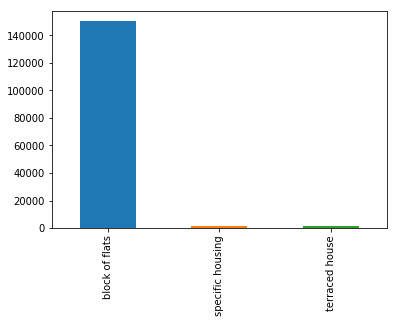

In [247]:
user_df['HOUSETYPE_MODE'].value_counts().plot(kind='bar')

### TOTALAREA_MODE

In [248]:
user_df['TOTALAREA_MODE'].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

In [249]:
user_df['TOTALAREA_MODE'].isnull().value_counts()

False    159080
True     148431
Name: TOTALAREA_MODE, dtype: int64

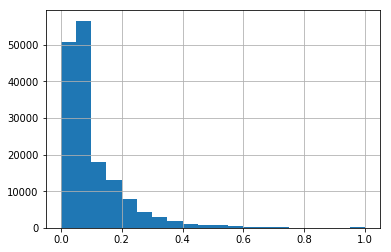

In [250]:
user_df['TOTALAREA_MODE'].hist(bins=20)

### WALLSMATERIAL_MODE

In [251]:
user_df['WALLSMATERIAL_MODE'].describe()

count     151170
unique         7
top        Panel
freq       66040
Name: WALLSMATERIAL_MODE, dtype: object

In [252]:
user_df['WALLSMATERIAL_MODE'].value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [253]:
user_df['WALLSMATERIAL_MODE'].isnull().value_counts()

True     156341
False    151170
Name: WALLSMATERIAL_MODE, dtype: int64

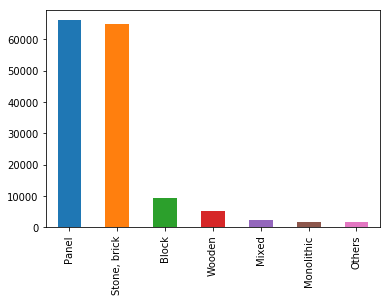

In [254]:
user_df['WALLSMATERIAL_MODE'].value_counts().plot(kind='bar')

### EMERGENCYSTATE_MODE

In [255]:
user_df['EMERGENCYSTATE_MODE'].describe()

count     161756
unique         2
top           No
freq      159428
Name: EMERGENCYSTATE_MODE, dtype: object

In [256]:
user_df['EMERGENCYSTATE_MODE'].isnull().value_counts()

False    161756
True     145755
Name: EMERGENCYSTATE_MODE, dtype: int64

In [257]:
user_df['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

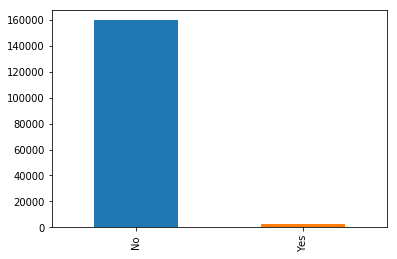

In [258]:
user_df['EMERGENCYSTATE_MODE'].value_counts().plot(kind='bar')

### OBS_30_CNT_SOCIAL_CIRCLE

In [259]:
user_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [260]:
user_df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().value_counts()

False    306490
True       1021
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [261]:
user_df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

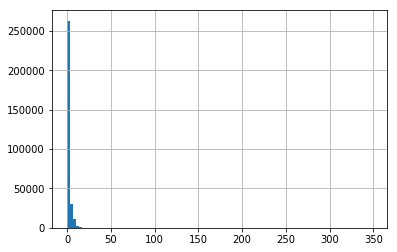

In [262]:
user_df['OBS_30_CNT_SOCIAL_CIRCLE'].hist(bins=100)

### DEF_30_CNT_SOCIAL_CIRCLE

In [263]:
user_df['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [264]:
user_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().value_counts()

False    306490
True       1021
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

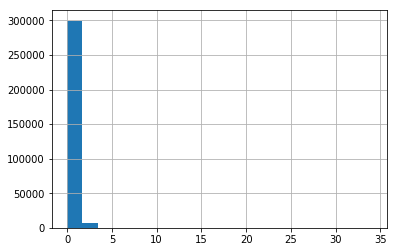

In [265]:
user_df['DEF_30_CNT_SOCIAL_CIRCLE'].hist(bins=20)

### OBS_60_CNT_SOCIAL_CIRCLE

In [266]:
user_df['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [267]:
user_df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().value_counts()

False    306490
True       1021
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

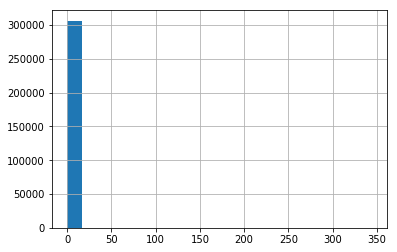

In [268]:
user_df['OBS_60_CNT_SOCIAL_CIRCLE'].hist(bins=20)

### DEF_60_CNT_SOCIAL_CIRCLE

In [269]:
user_df['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [270]:
user_df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().value_counts()

False    306490
True       1021
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

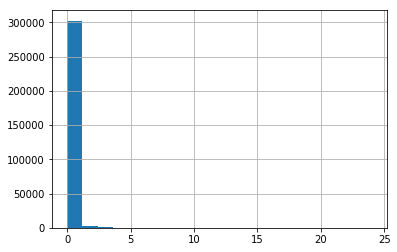

In [271]:
user_df['DEF_60_CNT_SOCIAL_CIRCLE'].hist(bins=20)

### DAYS_LAST_PHONE_CHANGE

In [272]:
user_df['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [273]:
user_df['DAYS_LAST_PHONE_CHANGE'].isnull().value_counts()

False    307510
True          1
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

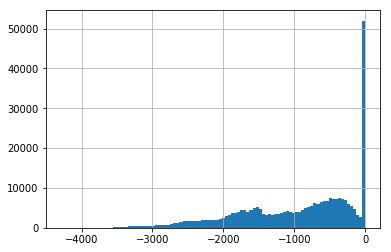

In [274]:
user_df['DAYS_LAST_PHONE_CHANGE'].hist(bins=100)

### FLAG_DOCUMENT

In [275]:
FLAG_DOCUMENTS = []
for ind in range(2, 22):
    FLAG_DOCUMENTS.append('FLAG_DOCUMENT_%d'%(ind,))

for item in FLAG_DOCUMENTS:
    print('==========%s=========='%(item,))
    print(user_df[item].describe())
    print(user_df[item].isnull().value_counts())
    print(user_df[item].value_counts())

==========FLAG_DOCUMENT_2==========
count    307511.000000
mean          0.000042
std           0.006502
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_2, dtype: float64
False    307511
Name: FLAG_DOCUMENT_2, dtype: int64
0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64
==========FLAG_DOCUMENT_3==========
count    307511.000000
mean          0.710023
std           0.453752
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_DOCUMENT_3, dtype: float64
False    307511
Name: FLAG_DOCUMENT_3, dtype: int64
1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64
==========FLAG_DOCUMENT_4==========
count    307511.000000
mean          0.000081
std           0.009016
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_4, dtype: float64
Fa

### AMT_REQ_CREDIT_BUREAU_HOUR

In [276]:
user_df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [277]:
user_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().value_counts()

False    265992
True      41519
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [278]:
user_df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

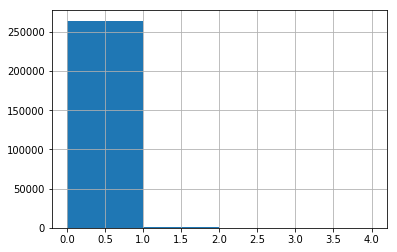

In [279]:
user_df['AMT_REQ_CREDIT_BUREAU_HOUR'].hist(bins=4)

### AMT_REQ_CREDIT_BUREAU_DAY

In [280]:
user_df['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [281]:
user_df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().value_counts()

False    265992
True      41519
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [282]:
user_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

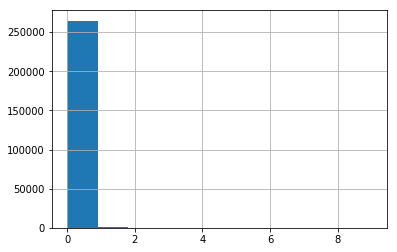

In [283]:
user_df['AMT_REQ_CREDIT_BUREAU_DAY'].hist(bins=10)

### AMT_REQ_CREDIT_BUREAU_WEEK

In [284]:
user_df['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [285]:
user_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().value_counts()

False    265992
True      41519
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [286]:
user_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

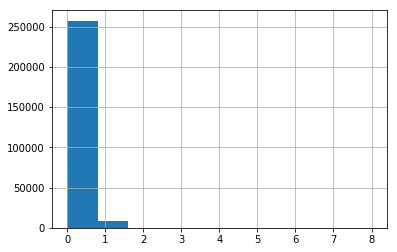

In [287]:
user_df['AMT_REQ_CREDIT_BUREAU_WEEK'].hist(bins=10)

### AMT_REQ_CREDIT_BUREAU_MON

In [288]:
user_df['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [289]:
user_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [290]:
user_df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().value_counts()

False    265992
True      41519
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

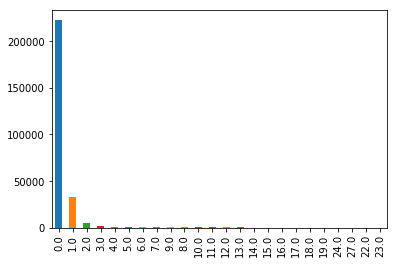

In [291]:
user_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts().plot(kind='bar')

### AMT_REQ_CREDIT_BUREAU_QRT

In [292]:
user_df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [293]:
user_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().value_counts()

False    265992
True      41519
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [295]:
user_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

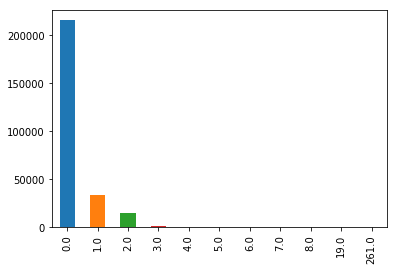

In [296]:
user_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts().plot(kind='bar')

### AMT_REQ_CREDIT_BUREAU_YEAR

In [297]:
user_df['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [298]:
user_df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().value_counts()

False    265992
True      41519
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [299]:
user_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

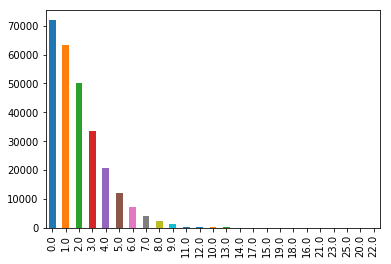

In [301]:
user_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts().plot(kind='bar')